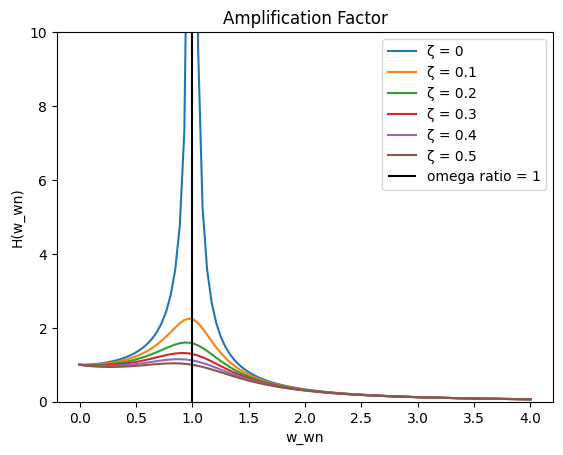

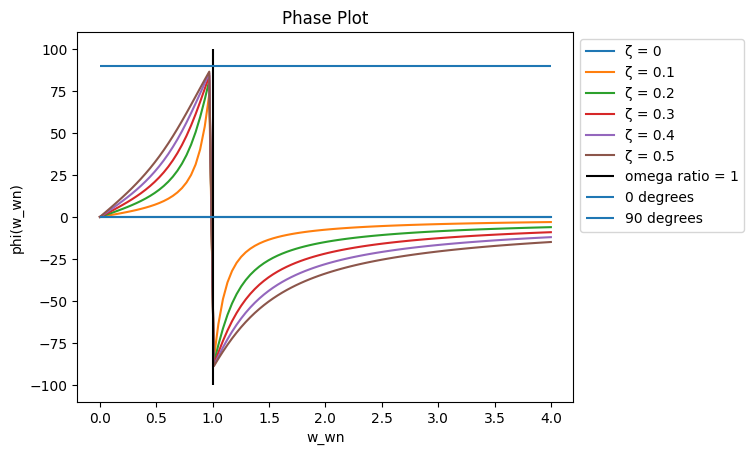

In [8]:
import numpy as np
import matplotlib.pyplot as plt
    # analytical graphs
H = lambda w_wn, zeta: 1 / ((1-w_wn**2)**2 + (2*zeta*w_wn))**0.5
phi = lambda w_wn, zeta: np.arctan((2*zeta*w_wn)/(1-w_wn**2))
w_values = np.linspace(0,4,100)
zeta_list = [0,0.1,0.2,0.3,0.4,0.5]
for i in zeta_list:
    plt.plot(w_values, H(w_values,i), label = '\u03B6 = ' + str(i))
plt.vlines(1,0,40, color = 'k',label='omega ratio = 1')
plt.ylim(0,10)
plt.xlabel('w_wn')
plt.ylabel('H(w_wn)')
plt.title('Amplification Factor')
plt.legend()
plt.show()
for i in zeta_list:
    plt.plot(w_values, phi(w_values,i)*(180/np.pi), label = '\u03B6 = ' + str(i))
plt.vlines(1,-100,100, color = 'k',label='omega ratio = 1')
plt.hlines(0,0,4,label='0 degrees')
plt.hlines(90,0,4,label='90 degrees')
plt.xlabel('w_wn')
plt.ylabel('phi(w_wn)')
plt.title('Phase Plot')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

(0, 1, 'Natural Frequency')
(2, 3, '8.2V')
(4, 5, '8.3V')
(6, 7, '8.4V')
(8, 9, '8.5V')
(10, 11, '8.6V')
(12, 13, '8.7V')
(14, 15, '8.8V')
(16, 17, '8.9V')
(18, 19, '9.0V')
(20, 21, '9.1V')
(22, 23, '9.2V')
(24, 25, '9.3V')
(26, 27, '9.4V')
(28, 29, '9.5V')
(30, 31, '9.6V')
(32, 33, '9.7V')
(34, 35, '9.8V')
(36, 37, '9.9V')
(38, 39, '10.0V')
(40, 41, 'Natural_Freq_w/Motor')


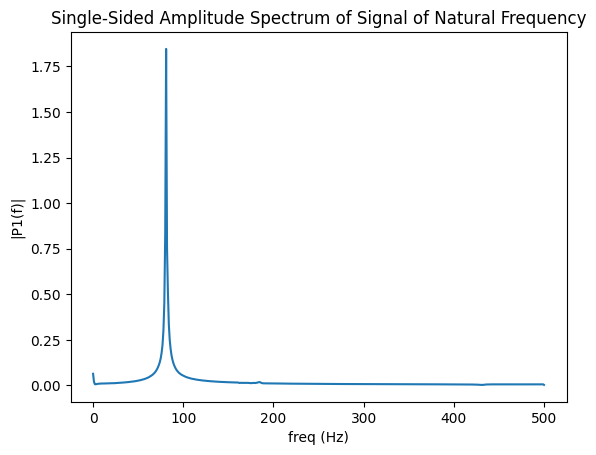

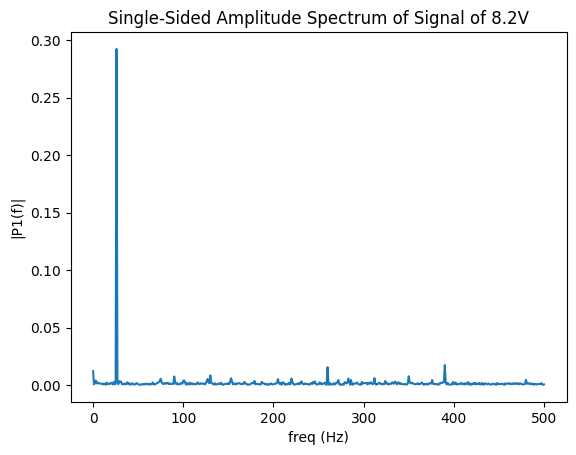

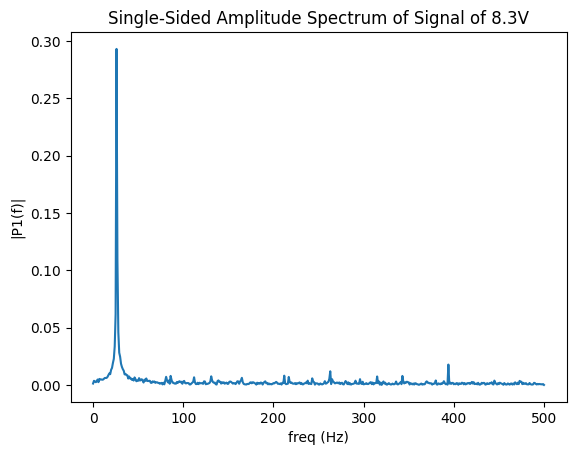

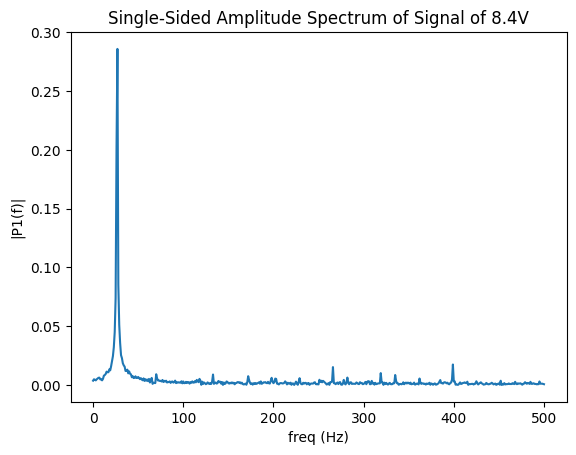

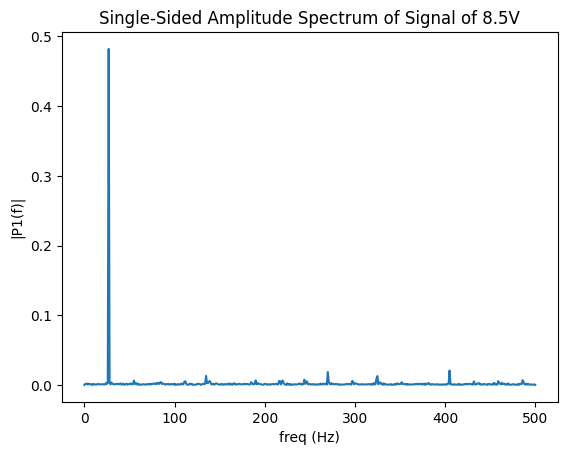

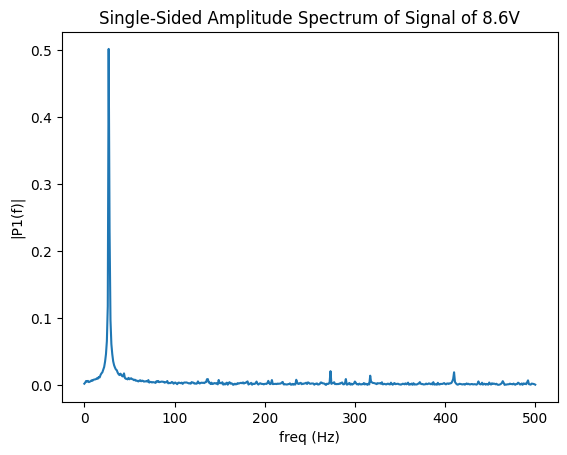

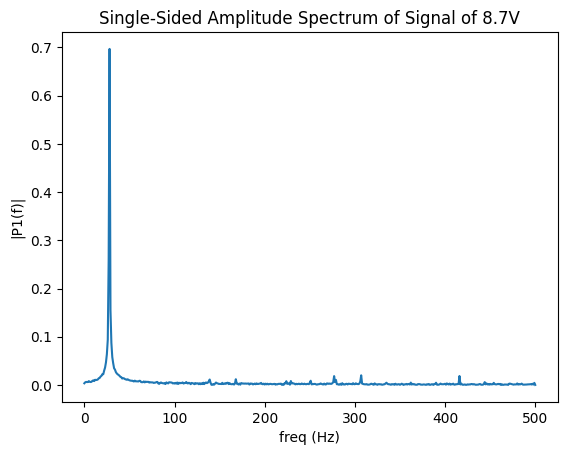

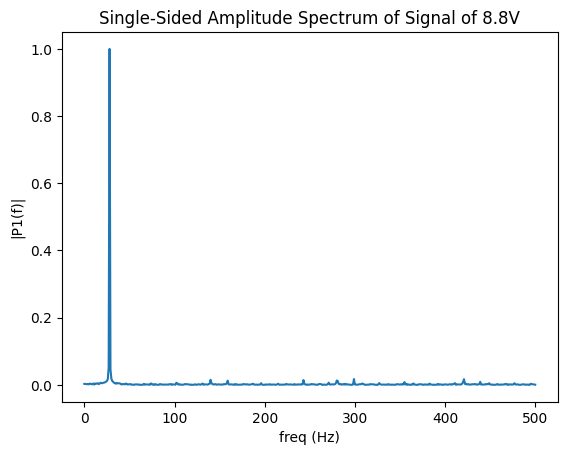

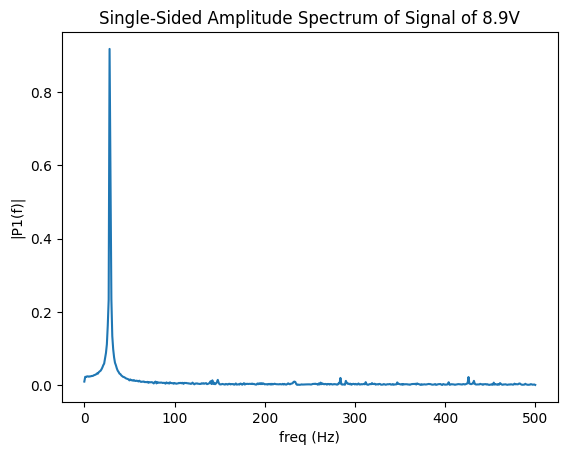

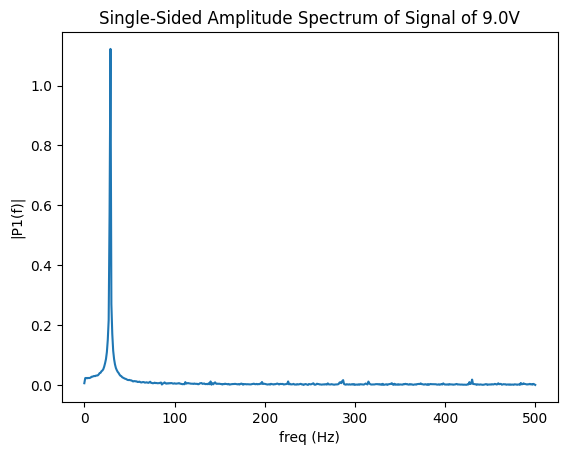

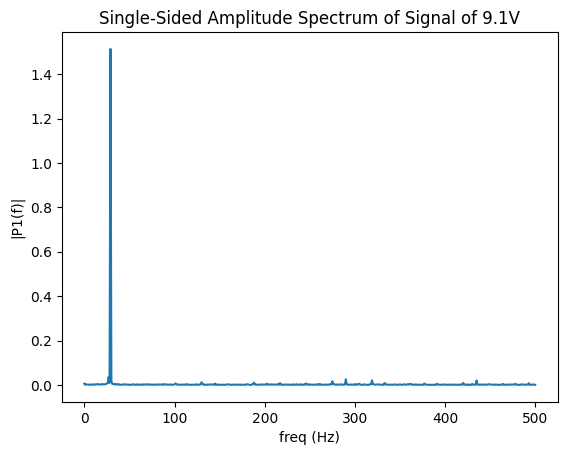

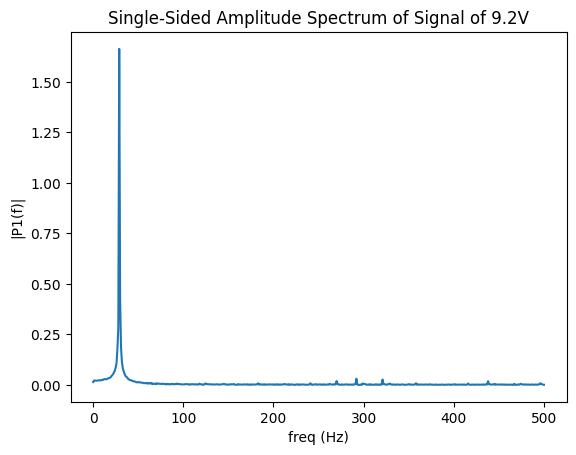

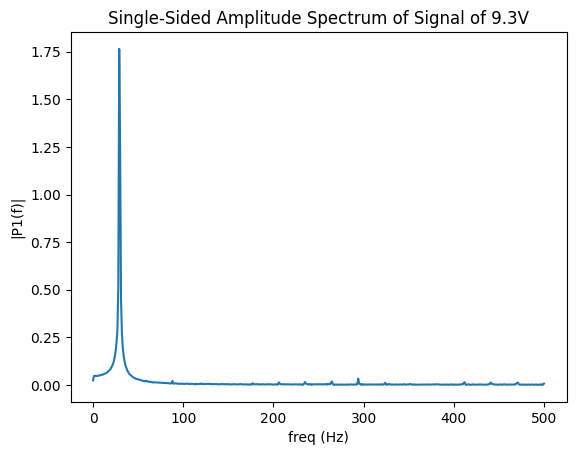

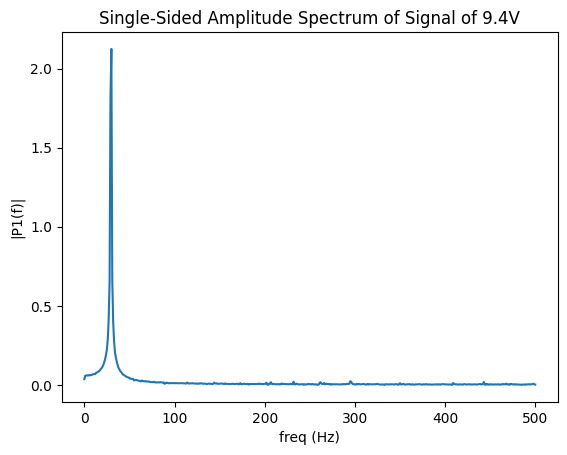

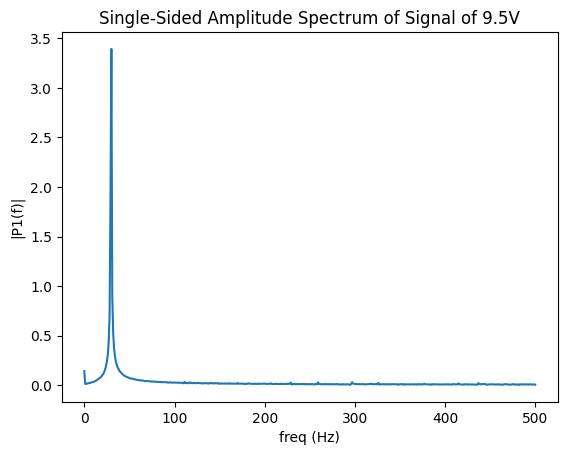

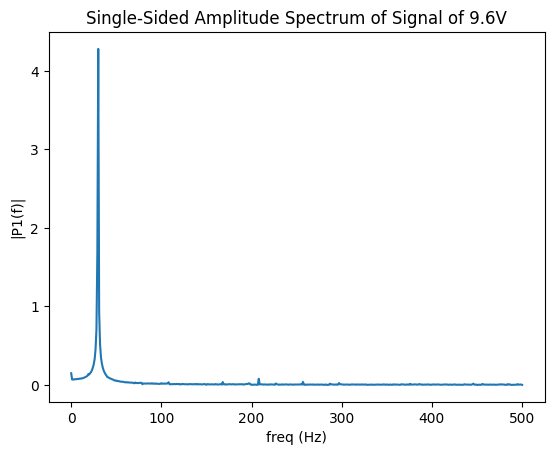

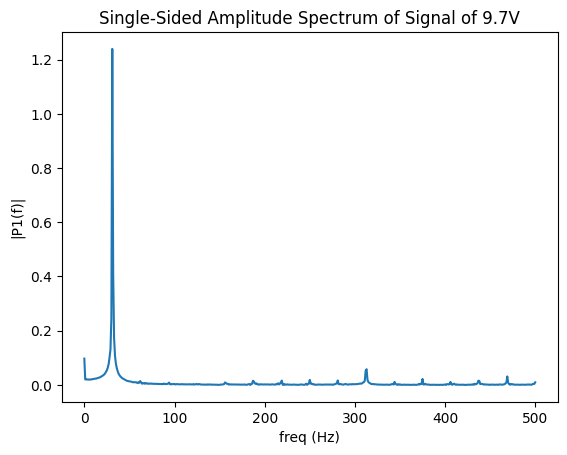

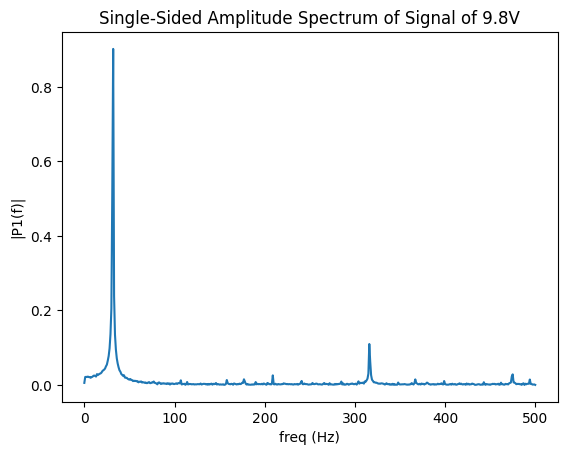

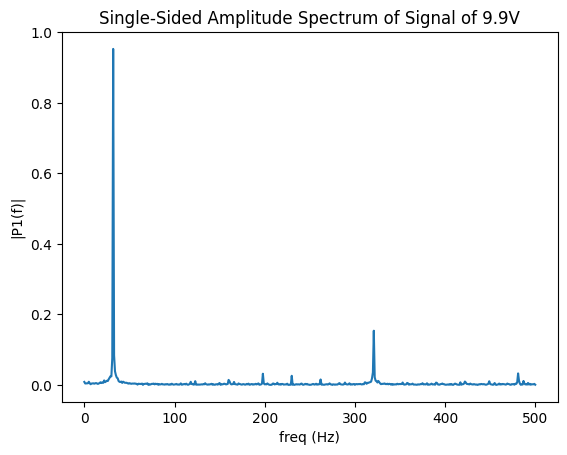

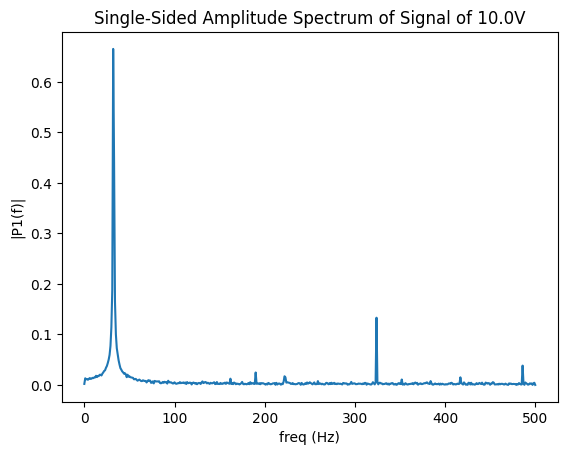

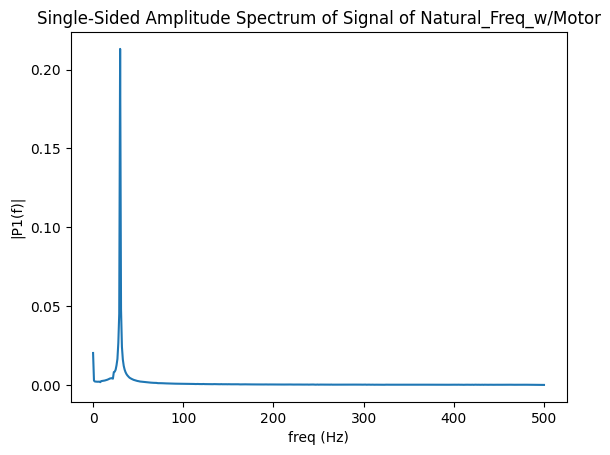

In [82]:
with open("Beam Vibration Lab data2.txt", "r", encoding="utf8") as data:
    header = data.readline().split('\t')
    head = header[0::2]
number_of_tests = 21
data_seperation_list = []
for i in range(1,number_of_tests+1):
    label = head[i-1]
    j = (2*i-2,2*i-1,label)
    print(j)
    data_seperation_list.append(j)
def FFT(column_deseperation_list):
# Read test matrix
    test = np.loadtxt('Beam Vibration Lab data2.txt', skiprows=2,usecols=(column_deseperation_list[0], column_deseperation_list[1]))
# Read time data from file
    t = test[:, 0]
# Read amplitude data from file
    amp = test[:, 1]
# Length of signal
    L = len(amp)
# Sampling frequency
    Fs = 1000
# Compute fast fourier transform of signal
    Y = np.fft.fft(amp)
# Compute the two-sided spectrum P2.
# Then compute the single-sided spectrum P1 based on P2
# and the even-valued signal length L.
    label = column_deseperation_list[2]
    f = Fs * np.arange(0, L/2 + 1) / L
    P2 = np.abs(Y / L)
    P1 = P2[0:L//2+1]
    P1[1:-1] = 2 * P1[1:-1]
# Create FFT plot
    plt.plot(f, P1)
    plt.title('Single-Sided Amplitude Spectrum of Signal of {}'.format(label))
    plt.xlabel('freq (Hz)')
    plt.ylabel('|P1(f)|')
    plt.show()
    return None
for i in data_seperation_list:
    FFT(i)